<a href="https://colab.research.google.com/github/tanishq252/Pneumodoc/blob/master/Pneumonia_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:27<00:00, 20.4MB/s]
100% 2.29G/2.29G [00:27<00:00, 90.0MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip
# add the set seed = 42
# visualisation

In [ ]:

import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
# from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# seed = 232
# np.random.seed(seed)
# tf.set_random_seed(seed)

In [ ]:
cd

/root


In [ ]:
cd ..

/


In [ ]:
cd "content"

/content


In [ ]:
os.listdir()

['.config',
 'kaggle.json',
 'chest-xray-pneumonia.zip',
 'chest_xray',
 'sample_data']

In [ ]:
cd "chest_xray"

/content/chest_xray


In [ ]:
os.path

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>

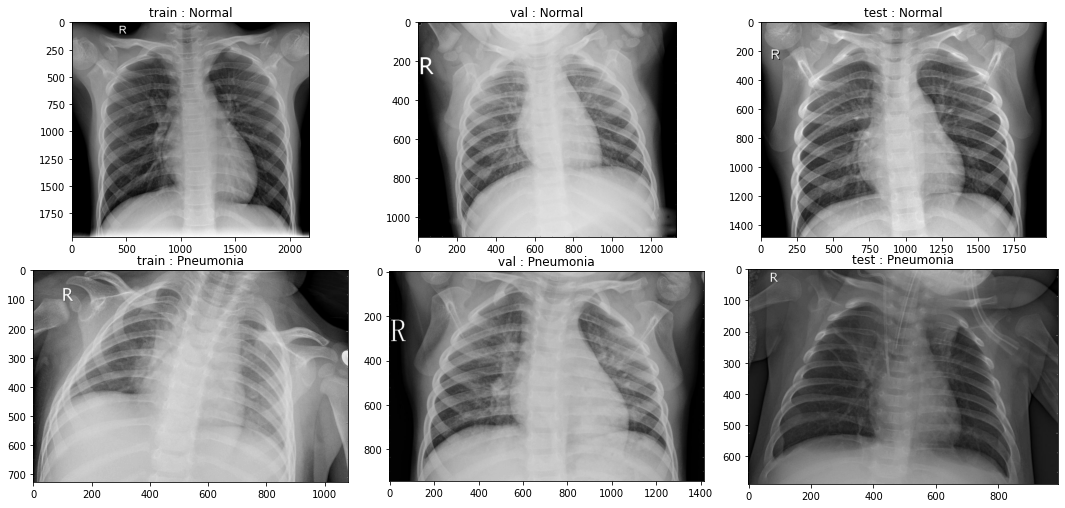

In [ ]:

input_path = '/content/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('{} : Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('{} : Pneumonia'.format(_set))

In [ ]:
from tensorflow.keras.utils import to_categorical

def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_gen = train_datagen.flow_from_directory(
        seed =7,
    directory=input_path+'train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
        seed =7,
    directory=input_path+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True)
    
   
    test_data = []
    test_labels = []
    test_labels_non_cat = []


    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + 'test' + cond)):
            img = plt.imread(input_path+'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
            test_labels_non_cat.append(label)


    test_data = np.array(test_data)
    test_labels_non_cat = np.array(test_labels_non_cat)
    test_labels = np.array(test_labels)
    test_labels = to_categorical(test_labels)
    
    return train_gen, test_gen, test_data, test_labels,test_labels_non_cat

In [ ]:

img_dims = 150
epochs = 15
batch_size = 32

train_gen, test_gen, test_data, test_labels,test_labels_non_cat = process_data(img_dims, batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# inputs = Input(shape=(img_dims, img_dims, 3))
# model  = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = inputs))
# model.add(Convo2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size = (2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape = inputs))
# model.add(Convo2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size = (2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',input_shape = inputs))
# model.add(Convo2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Dropout(rate=0.25))

# model.add(Flatten())

# model.add(Dense(512,activation = 'relu'))
# model.add(Dropout(rate = 0.7))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dropout(rate = 0.5))
# model.add(Dense(64,activation = 'relu'))
# model.add(Dropout(rate = 0.3))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
# x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
# x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.3)(x)

# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.25)(x)

In [ ]:
inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=2, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# without learning rate it gives very bad results
hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
# we can see that it is overfitting i.e training accuracy is high but
#  validation accuracy keeps on falling so let us try Reducing the learning rate
# making use of ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')


In [ ]:

hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size,callbacks = [lr_reduce])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
163/163 [==============================] - 80s 481ms/step - loss: 0.3526 - accuracy: 0.8322 - val_loss: 0.8729 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 78s 477ms/step - loss: 0.2681 - accuracy: 0.8919 - val_loss: 1.0998 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - 78s 477ms/step - loss: 0.2406 - accuracy: 0.9013 - val_loss: 1.4446 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 78s 479ms/step - loss: 0.2405 - accuracy: 0.9059 - val_loss: 1.0492 - val_accuracy: 0.6201 - lr: 0.0010
Epoch 5/15
163/163 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.9116
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 78s 480ms/step - loss: 0.2228 - accuracy: 0.9116 - val_loss: 0.3482 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 6/15
163/163 [=========================

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 separable_conv2d_8 (Separab  (None, 71, 71, 32)       688       
 leConv2D)                                                       
                                                                 
 separable_conv2d_9 (Separab  (None, 69, 69, 32)       1344

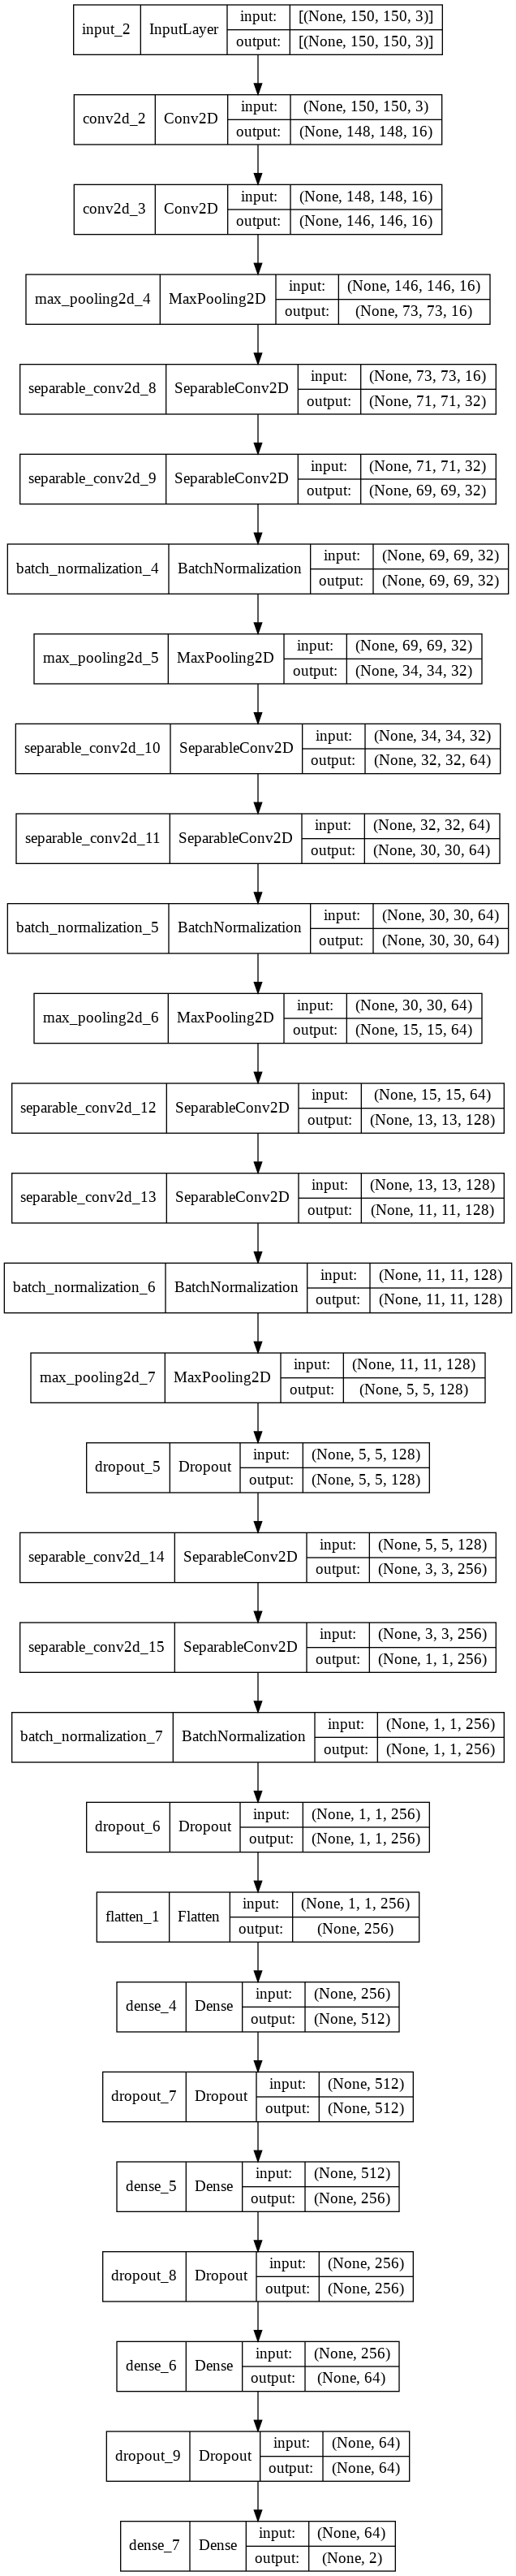

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

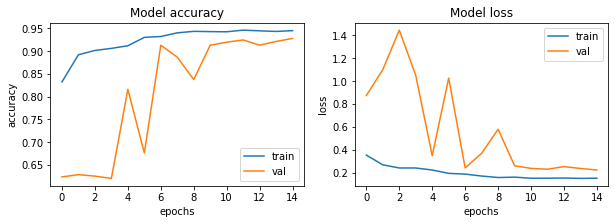

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
preds = model.predict(test_data)

In [ ]:
classes_x=np.argmax(preds,axis=1)

In [ ]:
classes_x

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_labels_non_cat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,


TEST METRICS ----------------------
Accuracy: 91.98717948717949%
Precision: 89.53488372093024%
Recall: 98.71794871794873%
F1-score: 93.90243902439025

TRAIN METRIC ----------------------
Train acc: 94.48
CONFUSION MATRIX ------------------
[[189  45]
 [  5 385]]


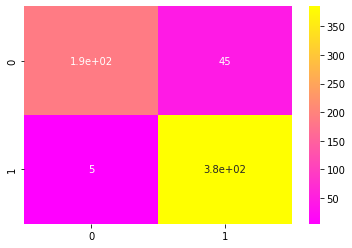

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



acc = accuracy_score(test_labels_non_cat, classes_x)*100
cm = confusion_matrix(test_labels_non_cat, classes_x)
tn, fp, fn, tp = cm.ravel()



print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['accuracy'][-1])*100, 2)))

print('CONFUSION MATRIX ------------------')
print(cm)
sns.heatmap(cm,cmap='spring',annot=True)

NORMAL


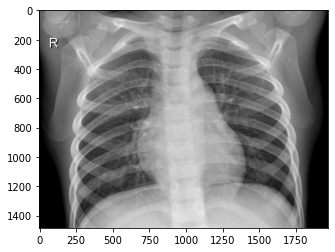

In [ ]:
plt.imshow(plt.imread('/content/chest_xray/test/NORMAL/'+os.listdir('/content/chest_xray/test/NORMAL/')[0]),cmap='gray')
if(classes_x[0]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")


NORMAL


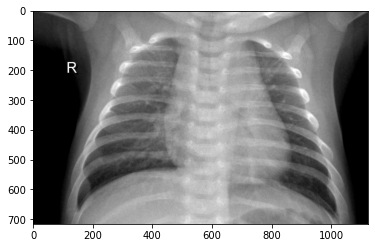

In [ ]:
plt.imshow(plt.imread('/content/chest_xray/test/NORMAL/'+os.listdir('/content/chest_xray/test/NORMAL/')[210]),cmap='gray')
if(classes_x[210]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")

NORMAL


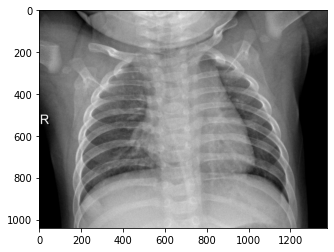

In [ ]:
plt.imshow(plt.imread('/content/chest_xray/test/NORMAL/'+os.listdir('/content/chest_xray/test/NORMAL/')[233]),cmap='gray')
if(classes_x[233]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")

PNEUMONIA


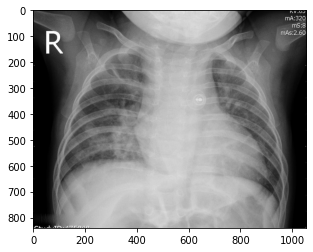

In [ ]:
# the NORMAL directory ends with 234 images so for prediction value 233 is added
plt.imshow(plt.imread('/content/chest_xray/test/PNEUMONIA/'+os.listdir('/content/chest_xray/test/PNEUMONIA/')[233]),cmap='gray')
if(classes_x[233+233]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")

PNEUMONIA


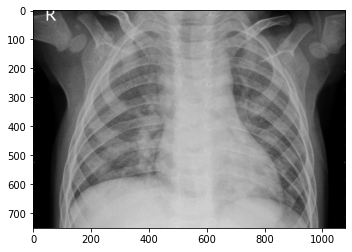

In [ ]:
plt.imshow(plt.imread('/content/chest_xray/test/PNEUMONIA/'+os.listdir('/content/chest_xray/test/PNEUMONIA/')[123]),cmap='gray')
if(classes_x[233+123]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")

PNEUMONIA


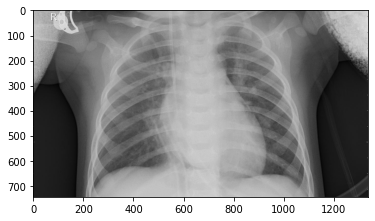

In [ ]:
plt.imshow(plt.imread('/content/chest_xray/test/PNEUMONIA/'+os.listdir('/content/chest_xray/test/PNEUMONIA/')[46]),cmap='gray')
if(classes_x[233+46]==0):
  print("NORMAL")
else:
  print("PNEUMONIA")

In [ ]:
model_json = model.to_json()
with open("/content/modelCNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/modelCNN.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
saved_dir = "/content"
tf.saved_model.save(model, saved_dir)

converter  = tf.lite.TFLiteConverter.from_saved_model(saved_dir)
tflite_model = converter.convert()

with open('model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /content/assets
